#### Web Scraping

In this lab, we will focus on web scraping, which involves programmatically interacting with websites to parse and extract relevant data. This process can range from a simple extraction of specific elements, like headlines or prices, to more complex tasks, such as navigating through multiple pages or handling dynamically loaded content.

Web scraping can be applied in numerous scenarios, such as:

1.   Data gathering: Amassing large datasets from multiple sources to serve as input for Machine Learning or data analysis.
2.   Market research: Extracting product information, reviews, and pricing to identify trends or perform competitive analysis.
3.   Opinion Mining in Social Media: Collecting user-generated content, like social media posts or reviews, to analyze public opinion on a particular topic or product.
4.   News aggregation: Aggregating news articles or blog posts to create a customized news feed.

### HTML
HTML (Hypertext Markup Language) is the standard markup language for creating web pages. It uses a system of tags to define the structure and presentation of a webpage. The basic structure of an HTML document includes elements like `<html>, <head>, <body>, <h1> to <h6> (headings), <p> (paragraph), <a> (link), <div>, <li> and <span>.`

We will be using BeautifulSoup to parse basic HTML pages.

In [27]:
#!pip install beautifulsoup4
#!pip install requests

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'http://quotes.toscrape.com/'
response = requests.get(url)
html_content = response.text

web_page = BeautifulSoup(html_content, 'html.parser')

# Raw html content of the page
print(web_page)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

We notice that the quotes all appear inside of div elements that have the "quote" class. For each div we notice that the text appears inside span elements with the "text" class.

For parsing the HTML of a web page it's recommended to use the browser viewing tools **(Ctrl + Shift + I)** and element inspect rather than printing out the structure in code each time.

In [29]:
# Find all quote blocks on the page
quote_blocks = web_page.find_all('div', class_='quote')

# Iterate through quote blocks and extract data
for quote_block in quote_blocks:
    quote_text = quote_block.find('span', class_='text').text
    quote_author = quote_block.find('small', class_='author').text
    quote_tags = [tag.text for tag in quote_block.find_all('a', class_='tag')]

    # Print the extracted data
    print("Quote:", quote_text)
    print("Author:", quote_author)
    print("Tags:", quote_tags)
    print("\n")

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: ['change', 'deep-thoughts', 'thinking', 'world']


Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: ['abilities', 'choices']


Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: ['inspirational', 'life', 'live', 'miracle', 'miracles']


Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: ['aliteracy', 'books', 'classic', 'humor']


Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe
Tags: ['be-yourself', 'inspirational']


Quote: “Try not to become a man of success. Rather beco

### Useful BeautifulSoup methods

**find(tag, attrs=None, recursive=True, text=None, **kwargs):**

> returns the first occurrence of the specified tag that matches the given attributes and other criteria.

**find_all(tag, attrs=None, recursive=True, text=None, limit=None, **kwargs) or findAll():**

> returns a list of all occurrences of the specified tag that match the given attributes and other criteria.

**get_text(separator='', strip=False) or text:**

> Returns the text content of a tag or BeautifulSoup object, optionally concatenated with a separator and/or stripped of leading/trailing whitespace.







# Exercise 1

Parse the https://weather.com/weather/monthly/l/20987c3dab0d41e9dbeca67096b2be5cd4c6bf3d93525a33974d5177e5e6592b website which shows the weather in Timișoara for the month of March.

1. Extract all the days with valid temperatures, their max temperature, their min temperature and their general weather (e.g. 'Mostly Cloudy').
    
    **Hint:** Use select() to extract data from all blocks with a common string in their class strings.


2. Create a dataframe out of this data having the "day", "max_t", "min_t" and "gen_weather" columns.

    For *max_t* and *min_t* please store the temperature in Celsius (use the following formula: C = 5/9 x (F-32))


3. Calculate the average temperature for the whole month (in C).

4. Display the coldest day in the month.

5. Display the average temperature for days that were **NOT** Partly Cloudy (in C).

In [30]:
url = 'https://weather.com/weather/monthly/l/20987c3dab0d41e9dbeca67096b2be5cd4c6bf3d93525a33974d5177e5e6592b'
response = requests.get(url)
html_content = response.text

web_page = BeautifulSoup(html_content, 'html.parser')

grid = web_page.find('div', class_='Calendar--gridWrapper--eVZRr')
buttons = grid.find_all('button')

In [31]:
buttons = [b for b in buttons if b["data-testid"] == 'ctaButton'] # keep only dates

In [32]:
buttons = [b for b in buttons if b["data-id"][9] == '4'] # keep only april

In [33]:
the_dates = []
max_temps = []
min_temps = []
g_weather = []

for button in buttons:
    spans = button.find_all('span')
    if ((spans[1].text != '--') and (spans[2].text != '--')): # filter null temps
        the_dates.append(int(spans[0].text))
        max_temps.append(int(spans[1].text[:-1]))
        min_temps.append(int(spans[2].text[:-1]))  
        titles = button.find_all('title')
        g_weather.append(titles[1].text)

In [34]:
print(max_temps)

[52, 61, 53, 39, 43, 43, 42, 47, 54, 61, 60, 55, 67, 56, 64, 62, 67, 57, 58, 64, 65, 66, 68, 68, 63, 61, 62, 67, 69, 69]


In [35]:
def celsius(tempF):
    return round (5/9 * (tempF-32),1)

max_temps_c = list(map(celsius, max_temps))
min_temps_c = list(map(celsius, min_temps))
  
print(max_temps_c)

[11.1, 16.1, 11.7, 3.9, 6.1, 6.1, 5.6, 8.3, 12.2, 16.1, 15.6, 12.8, 19.4, 13.3, 17.8, 16.7, 19.4, 13.9, 14.4, 17.8, 18.3, 18.9, 20.0, 20.0, 17.2, 16.1, 16.7, 19.4, 20.6, 20.6]


In [36]:
import pandas as pd
march_df = pd.DataFrame(data={'day': the_dates, 'max_t': max_temps_c, 'min_t': min_temps_c, 'gen_weather': g_weather})
march_df.set_index('day')

,max_t,min_t,gen_weather
day,,,
1,11.1,5.6,Rain
2,16.1,6.1,Scattered Showers
3,11.7,0.6,Scattered Showers
4,3.9,0.0,Rain
5,6.1,1.1,Rain and Snow
6,6.1,0.6,Mostly Cloudy
7,5.6,1.7,Scattered Showers
8,8.3,3.9,Cloudy
9,12.2,1.7,Cloudy


In [37]:
avg_temps = []
for (i,j) in zip(max_temps_c,min_temps_c):
    avg_temps.append(round((i+j)/2, 1))
    
print(round(sum(avg_temps)/len(avg_temps), 1))

10.4


In [38]:
lowest_temp     = min(min_temps_c)
lowest_temp_day = the_dates[min_temps_c.index(lowest_temp)]

print(lowest_temp_day)
print(lowest_temp)

4
0.0


In [39]:
march_df['avg_temp'] = avg_temps
march_df.set_index('day')

,max_t,min_t,gen_weather,avg_temp
day,,,,
1,11.1,5.6,Rain,8.3
2,16.1,6.1,Scattered Showers,11.1
3,11.7,0.6,Scattered Showers,6.1
4,3.9,0.0,Rain,1.9
5,6.1,1.1,Rain and Snow,3.6
6,6.1,0.6,Mostly Cloudy,3.3
7,5.6,1.7,Scattered Showers,3.6
8,8.3,3.9,Cloudy,6.1
9,12.2,1.7,Cloudy,6.9


In [40]:
t_sum = 0
count = 0

for index, row in march_df.iterrows():
    if row['gen_weather'] != 'Partly Cloudy':
        count = count + 1
        t_sum = t_sum + row['avg_temp']
        
print(round(t_sum/count,1))

9.7


### Multiple-page websites
When dealing with websites that have multiple pages of content, you'll often need to scrape data across these pages. To achieve this, you can loop through pages and extract information from each one.

Example: Scraping quotes from multiple pages on Quotes to Scrape (http://quotes.toscrape.com/):

In [3]:
import requests
from bs4 import BeautifulSoup

base_url = 'http://quotes.toscrape.com/page/{}/'

page_num = 1

while True:
    url = base_url.format(page_num)
    response = requests.get(url)
    html_content = response.text
    
    # Check if the page is empty or doesn't exist
    if "No quotes found!" in html_content:
        break

    soup = BeautifulSoup(html_content, 'html.parser')
    quote_blocks = soup.find_all('div', class_='quote')

    for quote_block in quote_blocks:
        quote_text = quote_block.find('span', class_='text').text
        quote_author = quote_block.find('small', class_='author').text
        quote_tags = [tag.text for tag in quote_block.find_all('a', class_='tag')]

        print("Quote:", quote_text)
        print("Author:", quote_author)
        print("Tags:", quote_tags)
        print("\n")

    page_num += 1


Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: ['change', 'deep-thoughts', 'thinking', 'world']


Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: ['abilities', 'choices']


Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: ['inspirational', 'life', 'live', 'miracle', 'miracles']


Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: ['aliteracy', 'books', 'classic', 'humor']


Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe
Tags: ['be-yourself', 'inspirational']


Quote: “Try not to become a man of success. Rather beco

Quote: “A reader lives a thousand lives before he dies, said Jojen. The man who never reads lives only one.”
Author: George R.R. Martin
Tags: ['read', 'readers', 'reading', 'reading-books']


Quote: “You can never get a cup of tea large enough or a book long enough to suit me.”
Author: C.S. Lewis
Tags: ['books', 'inspirational', 'reading', 'tea']


Quote: “You believe lies so you eventually learn to trust no one but yourself.”
Author: Marilyn Monroe
Tags: []


Quote: “If you can make a woman laugh, you can make her do anything.”
Author: Marilyn Monroe
Tags: ['girls', 'love']


Quote: “Life is like riding a bicycle. To keep your balance, you must keep moving.”
Author: Albert Einstein
Tags: ['life', 'simile']


Quote: “The real lover is the man who can thrill you by kissing your forehead or smiling into your eyes or just staring into space.”
Author: Marilyn Monroe
Tags: ['love']


Quote: “A wise girl kisses but doesn't love, listens but doesn't believe, and leaves before she is left.”
Au

Quote: “The truth." Dumbledore sighed. "It is a beautiful and terrible thing, and should therefore be treated with great caution.”
Author: J.K. Rowling
Tags: ['truth']


Quote: “I'm the one that's got to die when it's time for me to die, so let me live my life the way I want to.”
Author: Jimi Hendrix
Tags: ['death', 'life']


Quote: “To die will be an awfully big adventure.”
Author: J.M. Barrie
Tags: ['adventure', 'love']


Quote: “It takes courage to grow up and become who you really are.”
Author: E.E. Cummings
Tags: ['courage']


Quote: “But better to get hurt by the truth than comforted with a lie.”
Author: Khaled Hosseini
Tags: ['life']


Quote: “You never really understand a person until you consider things from his point of view... Until you climb inside of his skin and walk around in it.”
Author: Harper Lee
Tags: ['better-life-empathy']


Quote: “You have to write the book that wants to be written. And if the book will be too difficult for grown-ups, then you write it for childr

### Handling JavaScript-rendered content

Some websites use JavaScript to load or display content. To scrape such websites, you can use the Selenium library, which allows you to automate browser actions and interact with JavaScript-rendered content.

Example: Scraping JavaScript-rendered content:

In [ ]:
'''
# ONLY RUN THIS CELL IF YOU ARE IN COLAB OR ON A LINUX PC

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF
'''

In [4]:
#!apt-get update # Comment lines 1 and 2 if on your personal Windows pc
#!apt-get install chromium chromium-driver # Comment lines 1 and 2 if on your personal Windows pc
#!pip3 install selenium

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

url = "http://example.com/"
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome("chromedriver", options=options)
driver.get(url)
print(driver.title)
driver.quit()

Example Domain


In [5]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver', options=chrome_options)

# Navigate to the GitHub user's profile page
user = 'karpathy'
url = f'https://github.com/{user}?tab=repositories'
driver.get(url)

# Give the page time to load the repositories
time.sleep(3)

# Find and extract the repository names
repo_elements = driver.find_elements(By.CSS_SELECTOR, 'h3[class="wb-break-all"] a')
repo_names = [repo.text for repo in repo_elements]

# Print the extracted repository names
print(f"Repositories for user '{user}':")
for repo_name in repo_names:
    print(repo_name)

# Close the WebDriver
driver.quit()

Repositories for user 'karpathy':
nanoGPT
randomfun
micrograd
nn-zero-to-hero
ng-video-lecture
minGPT
arxiv-sanity-lite
makemore
convnetjs
lecun1989-repro
transformers
karpathy.github.io
arxiv-sanity-preserver
deep-vector-quantization
notpygamejs
optim
cryptos
karpathy
neuraltalk
ulogme
covid-sanity
gitstats
sqlitedict
pytorch-normalizing-flows
tsnejs
reinforcejs
pytorch-made
examples
char-rnn
svmjs


### Exercise 2
**Choose only one exercise, either A or B**

### **A.**

**Use Selenium to parse Yahoo finance and get the real-time stock information about the following tickers: ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA'].**

1. Get the current (real-time) price of each ticker. Hint: can search elements By.CSS_SELECTOR for information such as `'fin-streamer[data-test="qsp-price"]'` to match company price element.

2. Get the current absolute value of market change (e.g. +2.91$) of each ticker as well as the current percentage market change value (e.g. + 1.05%). 

3. Create a dataframe in which you store 5 entries for each company, each of the entries containing the following information: 

    **Ticker**, **Value \$**, **Market Change \$** (can be negative), **Market Change %** (can be negative), **Date and time** of reading.

    You can use the following code to obtain the date and time:

    ```
    from datetime import datetime
    current_date_time = datetime.now()
    ```

### **B.**
**Parse https://www.goodreads.com/list/show/1.Best_Books_Ever and get the top 300 best books from goodreads.**

1. Scrape the top 300 best books and the following information for each of them:

    **Title**, **Author**, **Ranking** (1st, 220th, etc.), **Score**, **Avg Rating** and **Description**.

2. Create a dataframe containing all of this information for the 300 books.

3. Display the book with the highest average rating.




In [6]:
from datetime import datetime

seconds = 2

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
driver = webdriver.Chrome('chromedriver', options=chrome_options)

stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

print("Loading initial page...")
driver.get('https://finance.yahoo.com/')
time.sleep(seconds)

print("Denying cookies...")
driver.find_element(By.CSS_SELECTOR, 'button[name="reject"]').click()
time.sleep(seconds)

stock_names = []
stock_values = []
dollar_changes = []
percent_changes = []
read_dates = []

for stock in stocks:
    print(f"Looking up {stock}...")
    driver.get(f'https://finance.yahoo.com/quote/{stock}')
    time.sleep(seconds)
    
    for i in range(5):
        stock_names.append(stock)
        stock_values.append(driver.find_element(By.CSS_SELECTOR, 'fin-streamer[data-test="qsp-price"]').text)
        dollar_changes.append(driver.find_element(By.CSS_SELECTOR, 'fin-streamer[data-test="qsp-price-change"]').text)
        percent_changes.append(driver.find_element(By.CSS_SELECTOR, 'fin-streamer[data-field="regularMarketChangePercent"]').text)
        read_dates.append(datetime.now())
        print(stock_values[-1])
        time.sleep(1)

print("Shutting down")
driver.quit()

Loading initial page...
Denying cookies...
Looking up AAPL...
166.47
166.47
166.47
166.47
166.47
Looking up GOOGL...
104.50
104.50
104.50
104.50
104.50
Looking up MSFT...
288.37
288.37
288.37
288.37
288.37
Looking up AMZN...
102.30
102.30
102.30
102.30
102.30
Looking up TSLA...
184.31
184.31
184.31
184.31
184.31
Shutting down


In [44]:
stocks_df = pd.DataFrame(data={'Ticker': stock_names, 'Value $': stock_values, 'Market Change $': dollar_changes, 'Market Change %': percent_changes, 'Date and time of reading': read_dates})
stocks_df

,Ticker,Value $,Market Change $,Market Change %,Date and time of reading
0,AAPL,165.23,+0.02,(-0.04%),2023-04-18 04:35:07.600099
1,AAPL,165.23,+0.02,(-0.04%),2023-04-18 04:35:08.650318
2,AAPL,165.23,+0.02,(-0.04%),2023-04-18 04:35:09.700940
3,AAPL,165.23,+0.02,(-0.04%),2023-04-18 04:35:10.752702
4,AAPL,165.23,+0.02,(-0.04%),2023-04-18 04:35:11.795472
5,GOOGL,105.97,-2.90,(-0.04%),2023-04-18 04:35:16.067985
6,GOOGL,105.97,-2.90,(-0.04%),2023-04-18 04:35:17.103706
7,GOOGL,105.97,-2.90,(-0.04%),2023-04-18 04:35:18.143156
8,GOOGL,105.97,-2.90,(-0.04%),2023-04-18 04:35:19.183544
9,GOOGL,105.97,-2.90,(-0.04%),2023-04-18 04:35:20.211129


### Social Media - Reddit

There are multiple useful libraries in python that help parse social media feed of different platforms. One such library is called PRAW (Python Reddit API Wrapper). PRAW makes it easy to access Reddit data and interact with the Reddit API. 



In [45]:
#!pip install praw

In [34]:
import praw

In [47]:
'''
# Replace the placeholder values with your own Reddit API credentials
client_id = 'your_client_id'
client_secret = 'your_client_secret'
user_agent = 'your_user_agent'

# Create a Reddit instance
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)
'''

"\n# Replace the placeholder values with your own Reddit API credentials\nclient_id = 'your_client_id'\nclient_secret = 'your_client_secret'\nuser_agent = 'your_user_agent'\n\n# Create a Reddit instance\nreddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)\n"

Note: To obtain your Reddit API credentials, follow the guide on Reddit's API documentation - https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example.

In [36]:
# For the sake of example, below you have a test user created for you
reddit = praw.Reddit(client_id='sIXZTihLNiKiHw',
                     client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ',
                     user_agent='Test1', check_for_async=False)

Let's see some basic PRAW functionality.

In [49]:
# Get the first 10 hot posts on the main page of reddit (/all)
hot_posts = reddit.subreddit('all').hot(limit=10)
for post in hot_posts:
    print(post.title, post.score)

Accused shooter in Kansas City shooting of Black teen who went to the wrong house will face 2 felony charges, officials announce 12230
Disney's first tweet immediately after Florida Governor Ron DeSantis threatened to build a prison next to Disney World 49553
We've finally found the true 'welfare queen.' It’s Clarence Thomas. 10734
TIL that Patrick Stewart, a theater actor, was hesitant to sign a 6 year contract to perform on Star Trek: TNG, but his agent reassured him that the show would probably fail after one season. Stewart expected to "make some money, get a suntan, and go home." 31365
Restoring an old lighter 7261
I heard a thump at the window and was shocked to find… 27794
I know people hate John Cena now, but this tells me he's a good person 66769
[Charania] Memphis Grizzlies C/F Jaren Jackson Jr. has won the 2022-23 NBA Defensive Player of the Year award. 5211
Using him as a punishment 18314
Spent an hour and lot of cash to have my 5 year olds hair done only to be surrounded i

In [50]:
# Get the first 10 hot posts from the ML subreddit and converting their data into a dataframe
import pandas as pd

posts = []
ml_subreddit = reddit.subreddit('MachineLearning')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts

,title,score,id,subreddit,url,num_comments,body,created
0,[D] Simple Questions Thread,20,12gls93,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,87,Please post your questions here instead of cre...,1.681052e+09
1,Reminder: Use the report button and read the r...,30,120f4oy,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,,1.679650e+09
2,[Discussion] Translation of Japanese to Englis...,144,12pqqg6,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,24,Hello. I am currently experimenting with the v...,1.681754e+09
3,[R] Foundation Model Alignment with RAFT🛶 in L...,26,12pnwp8,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,3,&#x200B;\n\nhttps://reddit.com/link/12pnwp8/vi...,1.681749e+09
4,[D] Assertion: Half Precision should be the de...,20,12po5c7,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,21,I'm just discovering half precision. It has S...,1.681749e+09
5,[R] Timeline of recent Large Language Models /...,686,12omnxo,MachineLearning,https://i.redd.it/gl11ce50xaua1.png,80,,1.681675e+09
6,[R] Mask DINO: Towards A Unified Transformer-b...,43,12p7ms3,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,13,&#x200B;\n\nhttps://i.redd.it/gtwek5z3jeua1.gi...,1.681719e+09
7,"[D] Fine-tuning LLMs for code generation, by m...",62,12p3si6,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,33,It seems to me that modern LLMs are extremely ...,1.681710e+09
8,[D] Hybrid generative model by concatenating R...,2,12q0sfl,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,3,does any one know of an implementation for pre...,1.681773e+09
9,[P] Chat With Any GitHub Repo - Code Understan...,594,12oh07a,MachineLearning,https://v.redd.it/h54v3zl3z9ua1,61,,1.681664e+09


In [51]:
# Getting a particular post by url or by id
submission = reddit.submission(url="https://www.reddit.com/r/MapPorn/comments/a3p0uq/an_image_of_gps_tracking_of_multiple_wolves_in/")
# or 
submission = reddit.submission(id="a3p0uq") #id comes after comments/

# Accessing the comments of a post
for top_level_comment in submission.comments:
    try:
        print(top_level_comment.body, top_level_comment.score)
        print('----------')
    except AttributeError:
        print(top_level_comment)
        print('----------')

I thought this was a shit post made in paint before I read the title 3716
----------
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass. 7532
----------
That’s really cool. The edges are surprisingly defined. 785
----------
White wolf is a dick constantly trespassing other's territories. 2979
----------
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not)  341
----------
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves.  81
----------
You know the white wolf fucked some red's bitch for sure.  873
----------
This what i am gonna show people when they ask for a photo of a sixpack 71
----------
It’s wild how they are all roughly the same 

In [52]:
# Access all comments from the post (including replies to comments)
#submission.comments.replace_more(limit=None)
#for comment in submission.comments.list():
#    print(comment.body)
#    print('----------')

### Exercise 3

Pick a subreddit of your choice and:

1. Create a dataframe containing title, score, id, subreddit, url, num_comments, body, time_created for the top 100 posts of all time of that subreddit.

2. Calculate the average number of comments of the top 10 posts (based on score) and the average number of comments of the bottom 10 posts (bottom 10 of the top 100).

3. Plot the top 10 most common words found in the titles of the top 100 posts. Split your titles into words before computing this.


In [53]:
# https://www.reddit.com/r/confession/

posts = []
subreddit = reddit.subreddit('confession')
for post in subreddit.top(limit=100):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts.index += 1
posts

,title,score,id,subreddit,url,num_comments,body,created
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09
2,I added Tabasco to Wendy’s chili and used it t...,45656,dm9kd6,confession,https://www.reddit.com/r/confession/comments/d...,1634,Title basically says it all. This wasn’t a pro...,1.571882e+09
3,Cop pulled me over and I called 911 and lied t...,36018,cetye8,confession,https://www.reddit.com/r/confession/comments/c...,1538,When I was 19 I was running late to work in my...,1.563464e+09
4,I used to bully my disabled brother for years,34965,a1jccq,confession,https://www.reddit.com/r/confession/comments/a...,2519,UPDATE:\n\nA lot of people were asking for an ...,1.543512e+09
5,I’ve stolen hundreds of dollars worth of water...,31924,bemwhc,confession,https://www.reddit.com/r/confession/comments/b...,968,My college has a food court in one of the main...,1.555601e+09
...,...,...,...,...,...,...,...,...
96,I used to steal coffee from Starbucks.,8453,dsrbjz,confession,https://www.reddit.com/r/confession/comments/d...,323,A couple years ago I downloaded the Starbucks ...,1.573096e+09
97,Sometimes I make it extra cold in my room at n...,8378,7lu4a2,confession,https://www.reddit.com/r/confession/comments/7...,167,,1.514103e+09
98,"I shoplifted over $6,000 worth of clothing in ...",8365,e7n3q0,confession,https://www.reddit.com/r/confession/comments/e...,432,This was almost ten years ago. I was a sales a...,1.575768e+09
99,I stole thousands of dollars in change over 2 ...,8293,az3u7e,confession,https://www.reddit.com/r/confession/comments/a...,518,When I was 16 I got a job at McDonald’s. I hat...,1.552141e+09


In [54]:
posts['num_comments'].head(10).mean()

1483.8

In [55]:
posts['num_comments'].tail(10).mean()

374.0

In [56]:
posts['word'] = posts['title'].str.split() # makes new column with list of words
# Explode the words column to create a new row for each word (this creates a separate row for each word from the newly created words list)
posts = posts.explode('word')
posts.dropna(subset=['word'],inplace=True)
posts.head(50)

,title,score,id,subreddit,url,num_comments,body,created,word
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,I'm
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,putting
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,my
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,extremely
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,profoundly
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,disabled
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,7
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,year
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,old
1,I'm putting my extremely profoundly disabled 7...,61423,c11din,confession,https://www.reddit.com/r/confession/comments/c...,2836,"I can't tell anyone this, even my therapist. L...",1.560628e+09,into


In [57]:
top_words=posts['word'].value_counts().head(10)
top_words

I      137
a       64
my      63
to      59
and     58
the     51
in      33
of      24
was     22
it      17
Name: word, dtype: int64

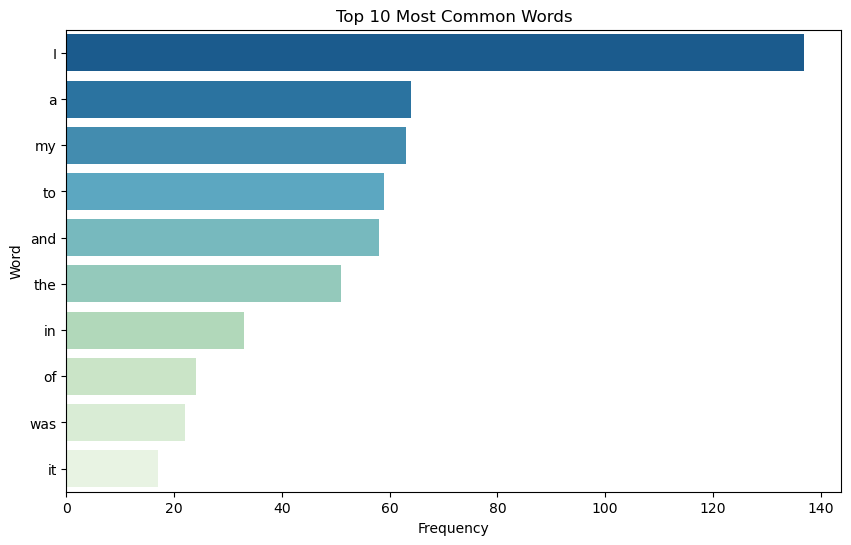

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y=top_words.index, x=top_words.values, orient='h', color='b', palette='GnBu_r')
plt.title('Top 10 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Topic Modelling
Topic modeling is an unsupervised machine learning technique that aims to identify the underlying topics or themes in a collection of documents. It helps to automatically organize, understand, and summarize large collections of textual data. Topic modeling has numerous applications, such as:

### LDA
Latent Dirichlet Allocation (LDA) is a popular generative probabilistic model used for topic modeling. LDA assumes that each document is a mixture of topics, and each topic is a distribution over words. The primary goal of LDA is to learn the topic distributions for each document and the word distributions for each topic.

### Stemming & Lemmatization

LDA performs best when working with clean data. Here we introduce two simple steps we can perform in text data cleaning / preprocessing. These two steps we introduce are not always necessary, but they help some algorithms perform better.

Stemming and lemmatization are natural language processing techniques used to reduce words to their base or root form. These techniques are commonly used in text preprocessing to reduce the dimensionality of the data, decrease noise, and improve the performance of text analysis algorithms. The main difference between the two is the approach they take to achieve this:

* **Stemming**: 

    Stemming algorithms work by cutting off the end or beginning of a 
    word, considering only a few common prefixes and suffixes. This can lead to crude results where the stemmed word might not always be a valid word in the language.

* **Lemmatization**: 

    Lemmatization algorithms take a more structured approach, considering the morphological analysis of the words. They aim to return the base or dictionary form of a word, known as the lemma. Lemmatization generally provides better results as it takes into account the context and part of speech of the word.



In [7]:
#nltk.download('omw-1.4')

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
#nltk.download('punkt')
#nltk.download('wordnet')



stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

word = "running"

stemmed_word = stemmer.stem(word)
lemmatized_word = lemmatizer.lemmatize(word, pos="v")

print(f"Original word: {word}")
print(f"Stemmed word: {stemmed_word}")
print(f"Lemmatized word: {lemmatized_word}")

Original word: running
Stemmed word: run
Lemmatized word: run


In this example, both stemming and lemmatization return the same base form for the word "running." However, lemmatization tends to provide more accurate results, as it takes into account the context and part of speech of the word.

Below are two other examples of stemming / lemmatizing.

In [9]:
word = "ran"

stemmed_word = stemmer.stem(word)
lemmatized_word = lemmatizer.lemmatize(word, pos="v")

print(f"Original word: {word}")
print(f"Stemmed word: {stemmed_word}")
print(f"Lemmatized word: {lemmatized_word}")

Original word: ran
Stemmed word: ran
Lemmatized word: run


In [10]:
word = "average"

stemmed_word = stemmer.stem(word)
lemmatized_word = lemmatizer.lemmatize(word, pos="v")

print(f"Original word: {word}")
print(f"Stemmed word: {stemmed_word}")
print(f"Lemmatized word: {lemmatized_word}")

Original word: average
Stemmed word: averag
Lemmatized word: average


In [11]:
#!pip install wikipedia

### Demonstrate LDA on wiki pages

We'll choose some wikipedia pages coming from various topics and will try to understand what the output of LDA looks like.

In [12]:
import wikipedia
import nltk

#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

# Religion and philosophy
religion = wikipedia.page("Religion")
philosophy = wikipedia.page("Philosophy")

# Science and technology
artificial_intelligence = wikipedia.page("Artificial Intelligence")
quantum_computing = wikipedia.page("Quantum Computing")

# Arts and architecture
mona_lisa = wikipedia.page("Mona Lisa")
eiffel_tower = wikipedia.page("Eiffel Tower")

# History and politics
world_war_2 = wikipedia.page("World War 2")
american_civil_war = wikipedia.page("American Civil War")


### Preprocess data
We first need to preprocess our data in order for LDA to be able to parse it.

In [13]:
#!pip install scikit-learn

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Add all our documents to a list
documents = [religion.content, philosophy.content, artificial_intelligence.content, quantum_computing.content, mona_lisa.content, eiffel_tower.content, world_war_2.content, american_civil_war.content]

# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize words
    words = word_tokenize(text)

    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]

    return ' '.join(words)

# Preprocess the documents
preprocessed_documents = [preprocess(doc) for doc in documents]
preprocessed_documents[0]

'religion range system including designated behavior practice moral belief worldviews text sanctified place prophecy ethic organization generally relate humanity supernatural transcendental spiritual scholarly consensus precisely constitutes religion different religion may may contain various element ranging divine sacredness faith supernatural practice may include ritual sermon commemoration veneration deity saint sacrifice festival feast trance initiation matrimonial funerary service meditation prayer music art dance public service religion sacred history narrative may preserved sacred text symbol holy place primarily aim give life meaning religion may contain symbolic tale may attempt explain origin life universe phenomenon follower believe true story traditionally faith reason considered source religious estimated distinct religion worldwide though nearly regionally based relatively small following four islam hinduism 77 world population 92 world either follows one four religion id

In [15]:
# Create term-document matrix which LDA needs to use as input
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_document_matrix = vectorizer.fit_transform(preprocessed_documents)
print(term_document_matrix[0]) # Print term-document column for the first wiki page

  (0, 2468)	271
  (0, 2387)	3
  (0, 903)	1
  (0, 412)	4
  (0, 2251)	34
  (0, 1962)	5
  (0, 413)	43
  (0, 3200)	1
  (0, 2937)	12
  (0, 2205)	8
  (0, 1143)	3
  (0, 2099)	3
  (0, 1368)	4
  (0, 1499)	2
  (0, 2991)	1
  (0, 2765)	8
  (0, 2609)	2
  (0, 712)	1
  (0, 2256)	2
  (0, 725)	3
  (0, 732)	3
  (0, 3096)	7
  (0, 1051)	5
  (0, 2388)	1
  (0, 1235)	19
  :	:
  (0, 754)	2
  (0, 1031)	2
  (0, 2357)	1
  (0, 2059)	1
  (0, 852)	1
  (0, 222)	1
  (0, 2646)	1
  (0, 2060)	1
  (0, 108)	1
  (0, 2248)	1
  (0, 1708)	1
  (0, 3217)	1
  (0, 2783)	1
  (0, 2796)	1
  (0, 815)	1
  (0, 370)	1
  (0, 671)	1
  (0, 1439)	2
  (0, 1689)	1
  (0, 333)	1
  (0, 627)	1
  (0, 91)	1
  (0, 2512)	1
  (0, 3111)	1
  (0, 2772)	1


**max_df=0.95**: This parameter indicates that any term (word) that appears in more than 95% of the documents should be ignored. This helps in filtering out very common words that do not contribute much to the meaning or topic of the text.

**min_df=2**: This parameter indicates that any term (word) that appears in fewer than 2 documents should be ignored. This helps in filtering out very rare words that might be typos or not relevant for the analysis.

**stop_words**='english': This parameter tells the vectorizer to remove English stop words (common words like 'and', 'is', 'in', etc.) from the text. These words usually do not carry significant meaning and can be removed to reduce the dimensionality of the data.

The output matrix is a sparse one, where each row represents a document and each column represents a unique term (word) in the entire corpus (collection of documents). The value at the matrix's (i, j) position is the number of times the term j appears in document i.


The column we've printed out above can be interpreted as such:
    
> (0, 2476)	272 can be interpreted as **word 2476 (which is the id attributed to an actual word) appears 272 times in document 0**.

In [21]:
# Apply LDA
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)

# Print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)

Topic #1: war union army south battle slavery civil north slave southern
Topic #2: philosophy painting philosophical century tradition science thought theory ancient work
Topic #3: religion quantum ai computer problem algorithm intelligence religious machine human
Topic #4: war german germany british army french russian power battle force


### Visualizing Topics

The output will be the most relevant n words considered by the LDA model that contributed to splitting the data into those 4 topics.

The results can vary, and are in general quite poor for small datasets.

We will use larger texts later, but for now let's visualize our topics in an elegant way using pyldavis.

In [12]:
#!pip install pyldavis

In [13]:
import pyLDAvis
import pyLDAvis.lda_model

# Prepare the LDA visualization data
visualization_data = pyLDAvis.lda_model.prepare(lda, term_document_matrix, vectorizer)

# Display the LDA visualization
pyLDAvis.display(visualization_data)

/home/andy/Apps/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### Checking how much a text belongs to a certain topic

We can check what's the probability of our documents belonging to each of the generated topics.


In [33]:
# Get the topic distribution for documents
document_topics = lda.transform(term_document_matrix)

# Display the topic distribution for the first document
print(document_topics[0])
for number in document_topics[0]:
    print(round(number,4))

[7.72219950e-05 3.77573472e-01 6.22273437e-01 7.58692532e-05]
0.0001
0.3776
0.6223
0.0001



For the current run we obtained that the first document has the highest chance of belonging to the topic at index 1 (2nd topic). 

(2nd topic = religion quantum computer ai problem religious algorithm intelligence machine human)

!Note: The results may look different when you run the code.

In [15]:
import numpy as np

# Find the most dominant topic for each document
dominant_topics = np.argmax(document_topics, axis=1)

# Display the dominant topics for all documents
print(dominant_topics[:])

[2 1 2 2 1 2 3 0]


### Exercise 4

**Choose A or B, not both**

**4A.** Obtain the text for 5 books of your choice, each having a different theme.

**4B.** Obtain the text for at least 100 comments coming from 4 reddit posts (each post on a different topic). In total >= 400 comments.

For the corpus of text obtained (either from A or B) do the following:

1. Run LDA on your text with 3, 4, 5 and 8 given as parameter to the model. Display the 3, 4, 5 and 8 topics that your text gets separated into.

2. Visualize the option from above that best seems to separate the text into valid topics. Use pyldavis for this.

3.  Depending on your corpus of text, choose:

    **A)** Display the probability of each book to belong to each of your n topics (use same n as you did for subexercise 2.)
    
    **B)** Display the probability of each post's title (in total 4 titles) to belong to each of your n topics (use same n as you did for subexercise 2.)

In [56]:
submission = reddit.submission(url="https://www.reddit.com/r/CryptoCurrency/comments/12a0j73/us_senator_elizabeth_warren_who_recently_launched/")
post1=""
title1=submission.title
submission.comments.replace_more(limit=1)
for i in range(100):
    #post1 += "\n------" + str(i) + "------\n" + submission.comments[i].body
    post1 += " " + submission.comments[i].body

In [57]:
submission = reddit.submission(url="https://www.reddit.com/r/interestingasfuck/comments/t4cdik/in_1996_ukraine_handed_over_nuclear_weapons_to/")
post2=""
title2=submission.title
submission.comments.replace_more(limit=1)
for i in range(100):
    #post2 += "\n------" + str(i) + "------\n" + submission.comments[i].body
    post2 += " " + submission.comments[i].body

In [58]:
submission = reddit.submission(url="https://www.reddit.com/r/space/comments/12alp8k/in_less_than_an_hour_nasa_will_announce_the_first/")
post3=""
title3=submission.title
submission.comments.replace_more(limit=1)
for i in range(100):
    #post3 += "\n------" + str(i) + "------\n" + submission.comments[i].body
    post3 += " " + submission.comments[i].body

In [59]:
submission = reddit.submission(url="https://www.reddit.com/r/ProgrammerHumor/comments/12ah6db/come_on_come_on_show_us_how_to_do_it/")
post4=""
title4=submission.title
submission.comments.replace_more(limit=1)
for i in range(100):
    #post4 += "\n------" + str(i) + "------\n" + submission.comments[i].body
    post4 += " " + submission.comments[i].body

In [68]:
r_comments = [post1, post2, post3, post4]

preprocessed_comments = [preprocess(doc) for doc in r_comments]
#preprocessed_comments[0]
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_document_matrix = vectorizer.fit_transform(preprocessed_comments)
#print(term_document_matrix[0])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)



In [70]:
n_topics = 3
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)

Topic #1: job script government company work money day idea developer better
Topic #2: exciting launch group actually live hope excited make thought human
Topic #3: country nuclear fucking war government security deal trust state word


In [72]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)

Topic #1: job script government company work money day idea developer better
Topic #2: moron fine came head kinda start expecting fake question hope
Topic #3: country nuclear fucking war security deal government state trust getting
Topic #4: moron fine came head kinda start expecting fake question hope
Topic #5: exciting launch group actually live hope excited make thought human


In [73]:
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)

Topic #1: job script government company work money day idea developer better
Topic #2: exciting launch group actually live hope excited make thought human
Topic #3: head kinda moron fine came start expecting fake question live
Topic #4: head kinda moron fine came start expecting fake question live
Topic #5: head kinda moron fine came start expecting fake question live
Topic #6: country nuclear fucking war security deal government state trust getting
Topic #7: head kinda moron fine came start expecting fake question live
Topic #8: head kinda moron fine came start expecting fake question live


In [74]:
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)

Topic #1: job script government company work money day idea developer better
Topic #2: exciting launch group actually hope live excited make thought human
Topic #3: country nuclear fucking war security deal government state trust getting
Topic #4: kinda fine head came moron start expecting fake question live


In [75]:
visualization_data = pyLDAvis.lda_model.prepare(lda, term_document_matrix, vectorizer)
pyLDAvis.display(visualization_data)

/home/andy/Apps/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [78]:
r_titles = [title1, title2, title3, title4]
preprocessed_documents = [preprocess(doc) for doc in r_titles]
preprocessed_documents[0]

'u senator elizabeth warren recently launched anti crypto campaign openly pushing cbdcs'

In [83]:
# Create term-document matrix which LDA needs to use as input
vectorizer = CountVectorizer(max_df=0.95, min_df=0, stop_words='english')
term_document_matrix = vectorizer.fit_transform(preprocessed_documents)
print(term_document_matrix[0]) # Print term-document column for the first

  (0, 24)	1
  (0, 9)	1
  (0, 28)	1
  (0, 22)	1
  (0, 15)	1
  (0, 3)	1
  (0, 8)	1
  (0, 5)	1
  (0, 20)	1
  (0, 21)	1
  (0, 6)	1


In [104]:
# Get the topic distribution for titles
#lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)
title_topics = lda.transform(term_document_matrix)

print(title_topics[0])

[0.02086393 0.0208603  0.93737611 0.02089966]


In [103]:
import numpy as np

# Find the most dominant topic for each document
dominant_topics = np.argmax(title_topics, axis=1)
# Display the dominant topics for all documents
print(dominant_topics[:])

[2 1 0 2]


### Exercise 5

Pick 4 subreddits of your choice and:

1. Create a dataframe containing title, score, id, subreddit, url, num_comments, body, time_created for the top 100 posts of all time of each subreddit.

    Split your dataframe into words (based on the content of body) and **find the top 10 most representative words from each subreddit based on tf_idf**.

2. Perform LDA on the body text of all 100 posts of all the 4 subreddits. 
Look at the top 10 representative words of each topic and compare them to the top 10 tf-idf words obtained above. (no need to use pandas for this)

3. Using NER visualize the most common 5 person names from each of the 4 subreddits and the number of times they each appear. Use a plot for your visualization.

4. Do an investigation / visualization of your choice on the data you have so far.